In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#import files from drive

train_data = '/content/drive/MyDrive/CottonDisease/train/'


In [3]:
type(train_data)

str

In [4]:
import pathlib
data_dir = pathlib.Path(train_data)

In [5]:
data_dir

PosixPath('/content/drive/MyDrive/CottonDisease/train')

In [6]:
from glob import glob

In [7]:
folders = glob('/content/drive/MyDrive/CottonDisease/train/*')

In [8]:
folders

['/content/drive/MyDrive/CottonDisease/train/diseased cotton plant',
 '/content/drive/MyDrive/CottonDisease/train/fresh cotton plant',
 '/content/drive/MyDrive/CottonDisease/train/diseased cotton leaf',
 '/content/drive/MyDrive/CottonDisease/train/fresh cotton leaf']

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1952


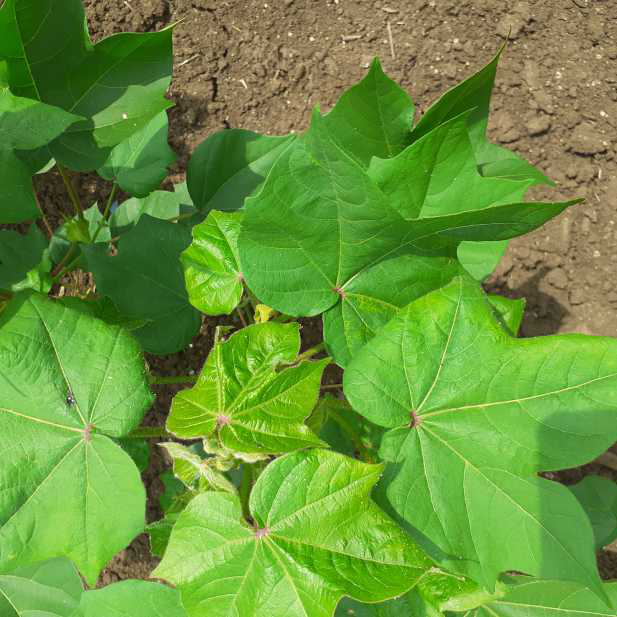

In [10]:
diseased = list(data_dir.glob('diseased cotton plant/*'))
PIL.Image.open(str(diseased[0]))

In [11]:
#create Dataset
batch_size = 32
image_width = 180
image_height = 180

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split = 0.2,
                                                               subset='training',
                                                               seed = 123,
                                                               image_size = (image_width,image_height),
                                                               batch_size = batch_size)

Found 1952 files belonging to 4 classes.
Using 1562 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split = 0.2,
                                                               subset='validation',
                                                               seed = 123,
                                                               image_size = (image_width,image_height),
                                                               batch_size = batch_size)

Found 1952 files belonging to 4 classes.
Using 390 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


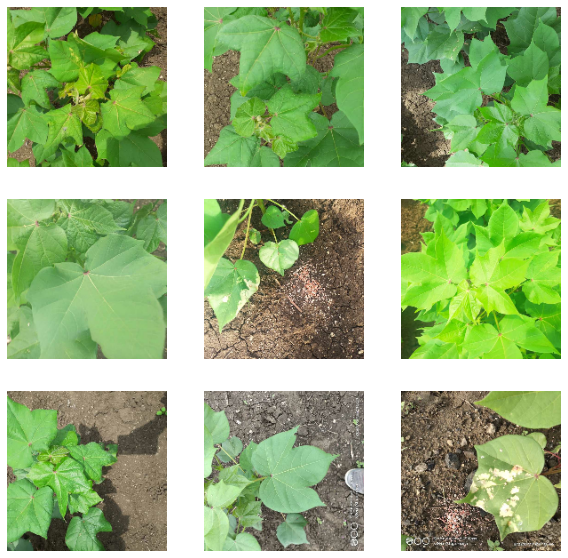

In [15]:
plt.figure(figsize=(10,10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    #plt.title(class_names.label[i])
    plt.axis('off')

In [16]:
for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

tarin_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [18]:
# create a model

num_classes = 5

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_width,image_height,3)),
                    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
49/49 [==============================] - 641s 13s/step - loss: 1.4456 - accuracy: 0.4127 - val_loss: 0.7299 - val_accuracy: 0.7359
Epoch 2/10
49/49 [==============================] - 7s 126ms/step - loss: 0.6800 - accuracy: 0.7279 - val_loss: 0.5701 - val_accuracy: 0.7795
Epoch 3/10
49/49 [==============================] - 7s 122ms/step - loss: 0.4733 - accuracy: 0.8149 - val_loss: 0.5378 - val_accuracy: 0.7974
Epoch 4/10
49/49 [==============================] - 7s 123ms/step - loss: 0.4133 - accuracy: 0.8435 - val_loss: 0.4795 - val_accuracy: 0.7949
Epoch 5/10
49/49 [==============================] - 7s 124ms/step - loss: 0.2916 - accuracy: 0.8897 - val_loss: 0.3835 - val_accuracy: 0.8513
Epoch 6/10
49/49 [==============================] - 7s 125ms/step - loss: 0.2553 - accuracy: 0.9044 - val_loss: 0.4119 - val_accuracy: 0.8538
Epoch 7/10
49/49 [==============================] - 7s 124ms/step - loss: 0.1217 - accuracy: 0.9550 - val_loss: 0.5704 - val_accuracy: 0.8051
Epoch 

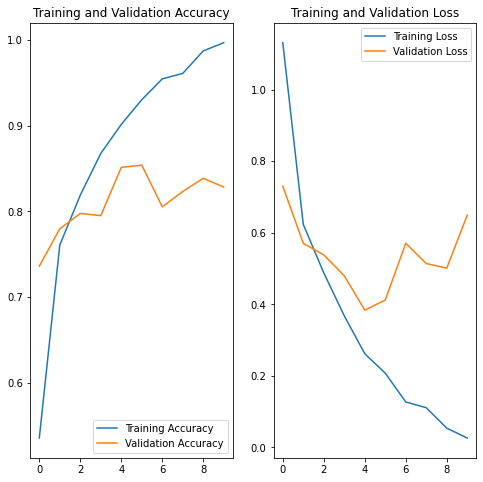

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# remove overfitting by data augmentation
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal',
                                                                                   input_shape=(image_width,image_height,3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)
])

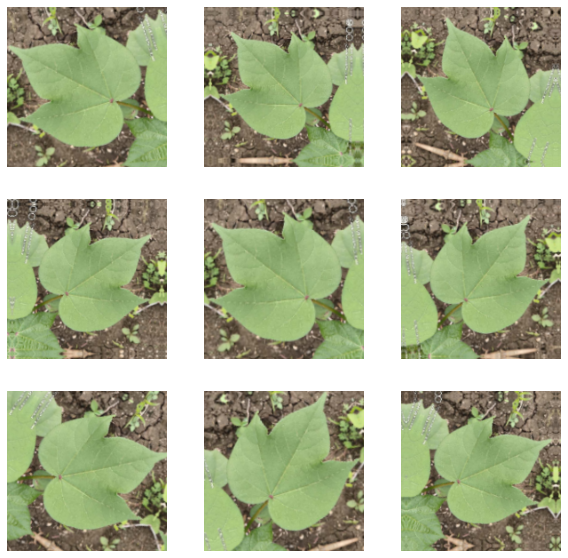

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

In [25]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [27]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
49/49 [==============================] - 8s 130ms/step - loss: 1.3573 - accuracy: 0.3861 - val_loss: 0.9179 - val_accuracy: 0.6436
Epoch 2/10
49/49 [==============================] - 7s 123ms/step - loss: 0.8850 - accuracy: 0.6509 - val_loss: 0.7604 - val_accuracy: 0.7026
Epoch 3/10
49/49 [==============================] - 7s 125ms/step - loss: 0.7124 - accuracy: 0.7234 - val_loss: 0.6694 - val_accuracy: 0.7359
Epoch 4/10
49/49 [==============================] - 7s 124ms/step - loss: 0.5994 - accuracy: 0.7640 - val_loss: 0.6676 - val_accuracy: 0.7231
Epoch 5/10
49/49 [==============================] - 7s 125ms/step - loss: 0.6044 - accuracy: 0.7598 - val_loss: 0.6079 - val_accuracy: 0.7410
Epoch 6/10
49/49 [==============================] - 7s 126ms/step - loss: 0.5506 - accuracy: 0.7852 - val_loss: 0.6632 - val_accuracy: 0.7538
Epoch 7/10
49/49 [==============================] - 7s 125ms/step - loss: 0.5038 - accuracy: 0.7977 - val_loss: 0.6541 - val_accuracy: 0.7487
Epoch 

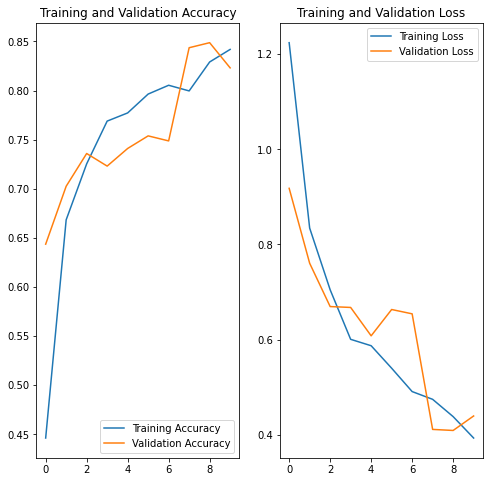

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
test_data = '/content/drive/MyDrive/CottonDisease/test/diseased cotton leaf/dis_leaf (124).jpg'
print(test_data)

/content/drive/MyDrive/CottonDisease/test/diseased cotton leaf/dis_leaf (124).jpg


In [53]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [54]:
img = keras.preprocessing.image.load_img(test_data,target_size=(image_height,image_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [55]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to diseased cotton leaf with a 98.12 percent confidence.
